In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import uproot
import random
import numba


In [2]:
targettree = uproot.open('Background/singMum_x2y2z300_370K.root:QA_ana')
targetdata = targettree.arrays(library="np")

In [3]:
detectorid=targettree["detectorID"].arrays(library="np")["detectorID"]
elementid=targettree["elementID"].arrays(library="np")["elementID"]

In [4]:
@numba.jit(nopython=True)
def clean(events):
    for j in range(len(events)):
        for i in range(500):
            if(events[j][i]>1000):
                events[j][i]=0
    return events

#Clean input data
elementid=clean(elementid)
detectorid=clean(detectorid)

In [5]:
ptracksElem=np.zeros(500)
ptracksDet=np.zeros(500)
#m=random.randrange(0,2) #Random number of partial tracks to input

n=random.randrange(0,len(elementid)) #Select random event number
r=random.randrange(1,n)
s=random.randrange(1,r)
#n=0
#r=20
#s=40

st1=random.randrange(1,34) #Selects station
st2=random.randrange(34,62) #Selects station        
st3=random.randrange(62,79) #Selects station   

print("This is the event:",n)
#for j in range(m):
for i in range(len(detectorid)):
    


    if(st1<=34 and detectorid[n][i]<=6):
        for l in range(0,6):
            #if(detectorid[n][l]>0):
            ptracksElem[l]=elementid[n][l]
            ptracksDet[l]=detectorid[n][l]
            #print("This is n:", n)
            #print("elemid", elementid[n][l])

    if(st2>34 and st2<=62 and detectorid[r][i]>=13 and detectorid[r][i]<=18):
        for l in range(12,18):
            ptracksElem[l]=elementid[r][l]
            ptracksDet[l]=detectorid[r][l]
           # print("This is n:", r)
            #print("elemid", elementid[r][l])
        
    if(st3>62 and detectorid[s][i]>=30):
        for l in range(18,30):
            ptracksElem[l]=elementid[s][l]
            ptracksDet[l]=detectorid[s][l]
            print("This is n:", s)
            print("elemid", elementid[s][l])        
      


This is the event: 348146
This is n: 85718
elemid 20
This is n: 85718
elemid 23
This is n: 85718
elemid 14
This is n: 85718
elemid 13
This is n: 85718
elemid 14
This is n: 85718
elemid 8
This is n: 85718
elemid 8
This is n: 85718
elemid 8
This is n: 85718
elemid 12
This is n: 85718
elemid 12
This is n: 85718
elemid 33
This is n: 85718
elemid 34
This is n: 85718
elemid 20
This is n: 85718
elemid 23
This is n: 85718
elemid 14
This is n: 85718
elemid 13
This is n: 85718
elemid 14
This is n: 85718
elemid 8
This is n: 85718
elemid 8
This is n: 85718
elemid 8
This is n: 85718
elemid 12
This is n: 85718
elemid 12
This is n: 85718
elemid 33
This is n: 85718
elemid 34
This is n: 85718
elemid 20
This is n: 85718
elemid 23
This is n: 85718
elemid 14
This is n: 85718
elemid 13
This is n: 85718
elemid 14
This is n: 85718
elemid 8
This is n: 85718
elemid 8
This is n: 85718
elemid 8
This is n: 85718
elemid 12
This is n: 85718
elemid 12
This is n: 85718
elemid 33
This is n: 85718
elemid 34
This is n: 

IndexError: index 500 is out of bounds for axis 0 with size 500

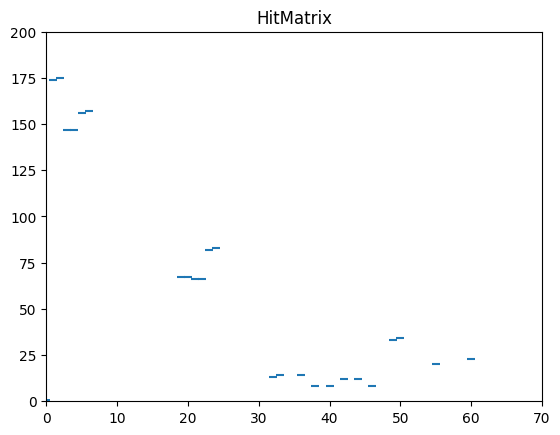

In [6]:
plt.title("HitMatrix")
plt.xlim(0,70)
plt.ylim(0,200)
plt.scatter(ptracksDet[:],ptracksElem[:],marker='_')

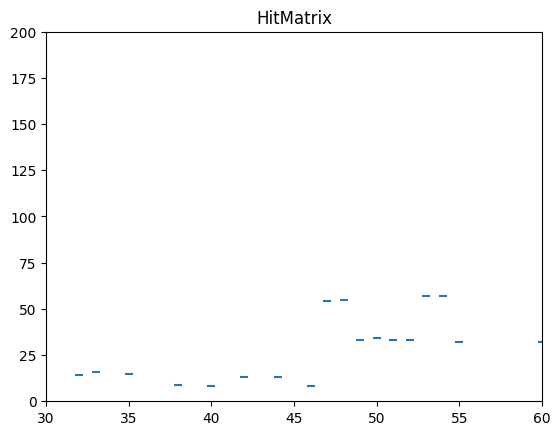

In [52]:
plt.title("HitMatrix")
plt.xlim(30,60)
plt.ylim(0,200)
plt.scatter(detectorid[s],elementid[s],marker='_')